## Linear Regression

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import r2_score

### Load the dataset: 
The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.
The objective is to use linear regression to understand how advertisement spending impacts sales.


In [2]:
data = pd.read_csv("data/Advertising.csv")

In [3]:
data.head(2)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

#### Remove the unnamed column

In [5]:
data = data.drop(['Unnamed: 0'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Relationship between features and response

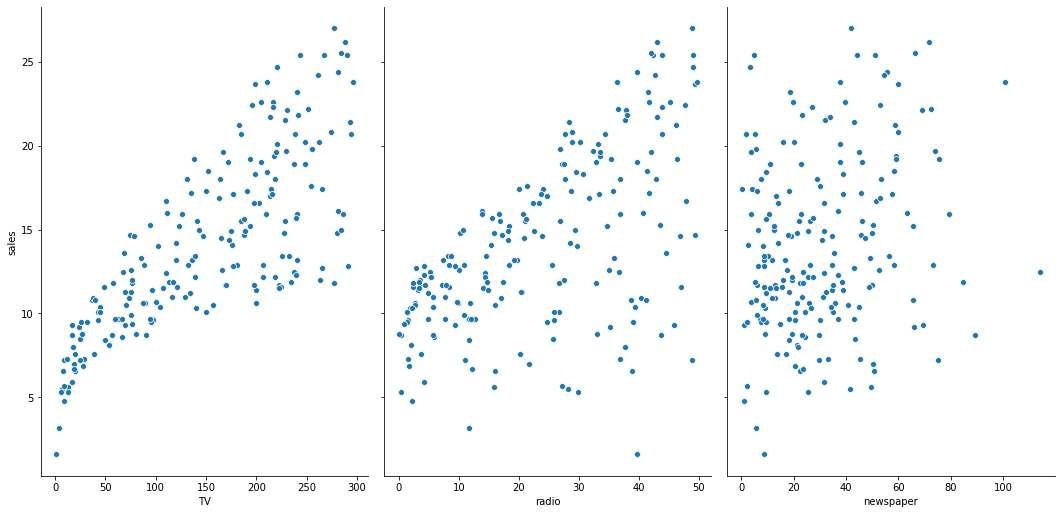

In [7]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7);

## Simple linear regression 


For simple linear regression, let’s consider only the effect of TV ads on sales. Lets see how the data looks like.
As you can see, there is a clear relationship between the amount spent on TV ads and sales.


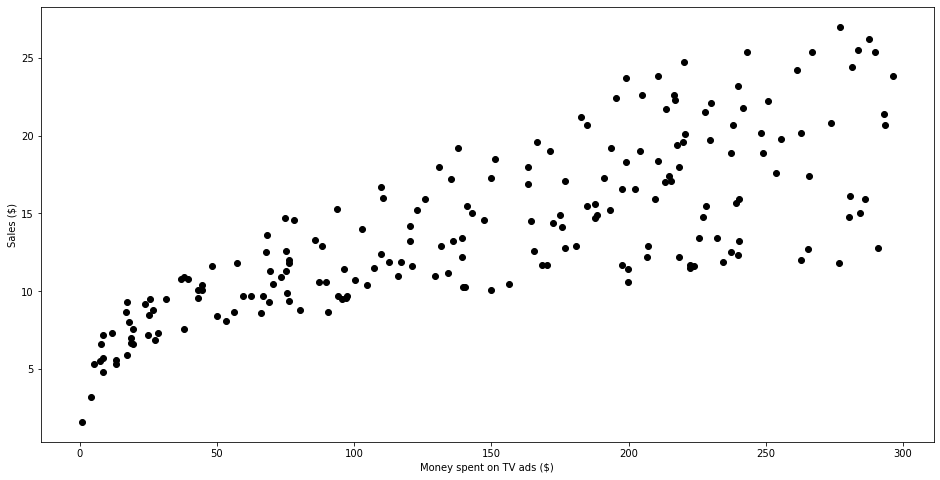

In [8]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

#### Training the single linear regression model

In [9]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.04753664043301975
7.032593549127695
The linear model is: Y = 7.0326 + 0.047537X


#### Predictions

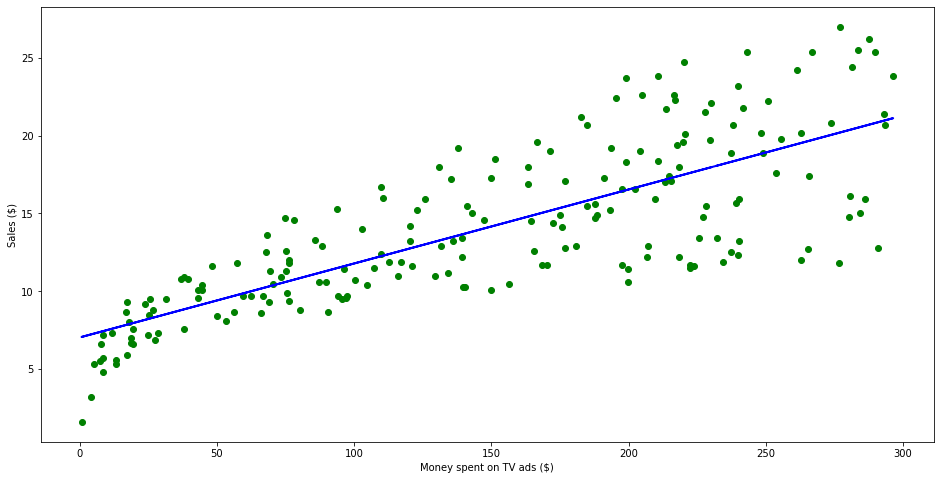

In [11]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='green'
)
plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [12]:
print("R^2: ", r2_score(y, predictions))

R^2:  0.611875050850071


From the graph above, it seems that a simple linear regression can explain the general impact of amount
spent on TV ads and sales. To see the performance of the model, we will look at the R² value and the p-value from each coefficient.

In [13]:
X = data['TV']
y = data['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           1.47e-42
Time:                        00:06:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

Looking at both coefficients, we have a p-value that is very low (although it is probably not exactly 0). 
This means that there is a strong correlation between these coefficients and the target (Sales).
Then, looking at the R² value, we have 0.612. Therefore, about 60% of the variability of sales 
is explained by the amount spent on TV ads. This is okay, but definitely not the best we can to accurately predict the sales. Surely, spending on newspaper and radio ads must have a certain impact on sales.
Let’s see if a multiple linear regression will perform better.

## Multiple linear regression 

### Estimating Coefficients

In [14]:
feature_cols = ['TV', 'radio', 'newspaper']
Xs = data[feature_cols]
y = data['sales']

reg = LinearRegression()
reg.fit(Xs, y)

print(reg.intercept_)
print(reg.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [15]:
list(zip(feature_cols, reg.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820448),
 ('newspaper', -0.0010374930424763285)]

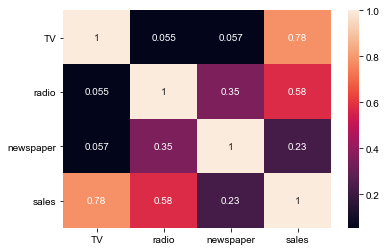

In [16]:
sns.heatmap(data.corr(), annot=True)
sns.set()

In [17]:
m1 = LinearRegression().fit(Xs[['TV', 'radio']], y)
m1_preds = m1.predict(Xs[['TV', 'radio']])

print("R^2: ", r2_score(y, m1_preds))

R^2:  0.8971942610828956


In [18]:
m2 = LinearRegression().fit(Xs[['TV', 'radio', 'newspaper']], y)
m2_preds = m2.predict(Xs[['TV', 'radio', 'newspaper']])

print("R^2: ", r2_score(y, m2_preds))

R^2:  0.8972106381789522


In [19]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           1.58e-96
Time:                        00:06:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

The coefficient for newspaper is negative,but also fairly small. Is it relevant to our model? Let’s see by calculating the F-statistic, R² value and p-value for each coefficient.

The R² is much higher than that of simple linear regression, with a value of 0.897!
Also, the F-statistic is 570.3. This is much greater than 1, and since our data set is fairly small (only 200 data points), 
it demonstrates that there is a strong relationship between ad spending and sales.
Finally, because we only have three predictors, we can consider their p-value to determine if they are relevant to the model or not.
Also, the third coefficient (the one for newspaper) has a large p-value. 
Therefore, ad spending on newspaper is not statistically significant. 
Removing that predictor might make better predictions.


### Model Evaluation Using Train/Test Split and Metrics

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data[['TV', 'radio']]
y = data.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

reg2 = LinearRegression()
reg2.fit(X_train, y_train)
reg2_preds = reg2.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, reg2_preds)))
print("R^2: ", r2_score(y_test, reg2_preds))

RMSE : 1.387903469938289
R^2:  0.9176214942248907


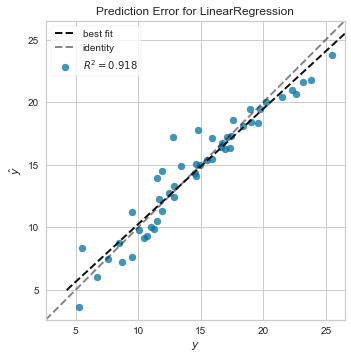

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [21]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(reg2)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

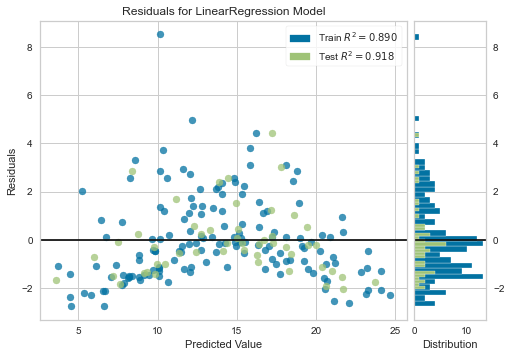

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [22]:
visualizer = ResidualsPlot(reg2)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

### Interaction Effect (Synergy)

RMSE : 0.7011871137164328
R^2:  0.978973681468126


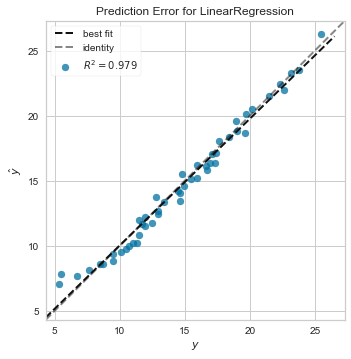

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [23]:
data['interaction'] = data['TV'] * data['radio']

X = data[['TV', 'radio', 'interaction']]
y = data.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

reg3 = LinearRegression()
reg3.fit(X_train, y_train)
reg3_preds = reg3.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, reg3_preds)))
print("R^2: ", r2_score(y_test, reg3_preds))

visualizer = PredictionError(reg3)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

There is an interaction between TV and Radio which influences the sales. Capturing this interaction results in better prediction and lower RMSE.